# Polynomial Prediction
 
 Given a polyniial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
[-9.         -7.85131195 -6.95335277 -6.27113703 -5.7696793  -5.41399417
 -5.16909621 -5.         -4.87172012 -4.74927114 -4.59766764 -4.3819242
 -4.06705539 -3.6180758  -3.        ]


Text(0.5, 1.0, 'Polynomial Regression')

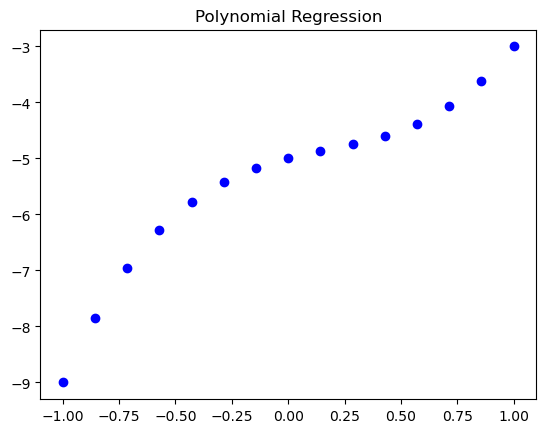

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)
print(x_values)

y_pred = f(x_values) # exact based on the polynomial
print(y_pred)

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

## Chi Square 

Chi Squared is a statistic that measures how well the model fits the observed data.
 
$$
\chi^2 = \sum_{i=1}^{N} \frac{(y_{\text{observed},i} - y_{\text{model},i})^2}{\sigma_i^2}

$$

To find the best-fitting polynomial, we want to minimize $\chi^2$. To do this, we can use `scipy.optimize.minimize()`

X values: [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
Y True: [-9.         -7.85131195 -6.95335277 -6.27113703 -5.7696793  -5.41399417
 -5.16909621 -5.         -4.87172012 -4.74927114 -4.59766764 -4.3819242
 -4.06705539 -3.6180758  -3.        ]
Y Observed: [-9.150441   -7.8590371  -7.0316885  -6.33710983 -5.84497603 -5.21666146
 -5.25289081 -5.28708301 -5.02073057 -4.88634306 -4.59236052 -4.42202385
 -4.09735585 -3.47017281 -2.94449348]
Best-fit parameters (Chi-Squared Minimization): [ 2.22139751 -0.9001144   0.90475964 -5.08465714]


array([ 2.22139751, -0.9001144 ,  0.90475964, -5.08465714])

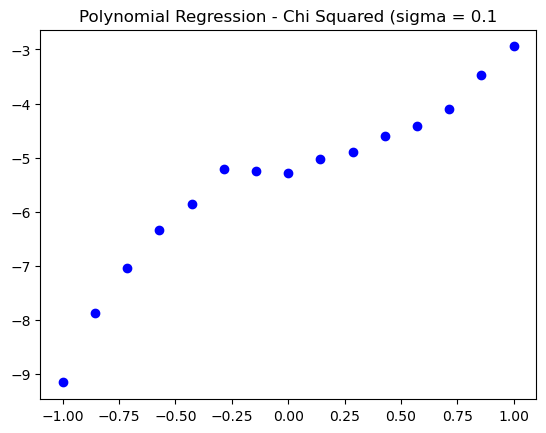

In [2]:
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
chi_sq = PolynomialRegressionChiSquared(sigma = 0.1)
print(f"X values: {chi_sq.x_values}")
print(f"Y True: {chi_sq.y_true}")
print(f"Y Observed: {chi_sq.y_observed}")

plt.scatter(chi_sq.x_values, chi_sq.y_observed, color = 'blue')
plt.title("Polynomial Regression - Chi Squared (sigma = 0.1)")

chi_sq.minimize_chi_square()



### Chi - Squared Regression 


In [ ]:
# Example 

from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
chi_sq = PolynomialRegressionChiSquared(sigma = 0.1)
print(f"X values: {chi_sq.x_values}")
print(f"Y True: {chi_sq.y_true}")
print(f"Y Observed: {chi_sq.y_observed}")

plt.scatter(chi_sq.x_values, chi_sq.y_observed, color = 'blue')
plt.title("Polynomial Regression - Chi Squared (sigma = 0.1")

chi_sq.minimize_chi_square()



Best-fit parameters (Chi-Squared Minimization): [ 2.08399609 -0.96488106  0.89264508 -5.03277184]
Area estimation using Simpson's method: -10.714940989471323
Area estimation using Trapezoidal method: -10.702426055203693


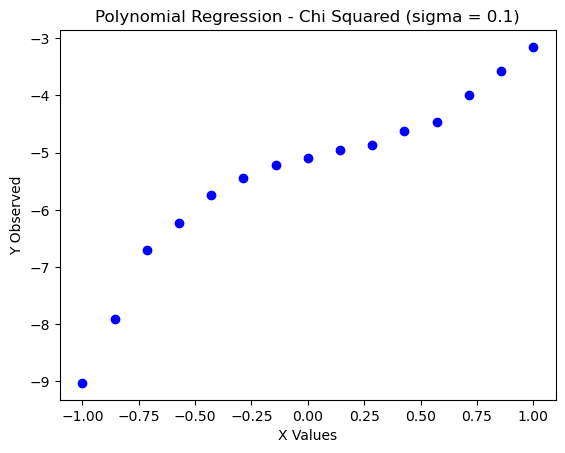

Best-fit parameters (Chi-Squared Minimization): [ 1.92985589 -0.85326069  1.31906267 -5.12564453]
Area estimation using Simpson's method: -10.820930982437
Area estimation using Trapezoidal method: -10.799789658437222


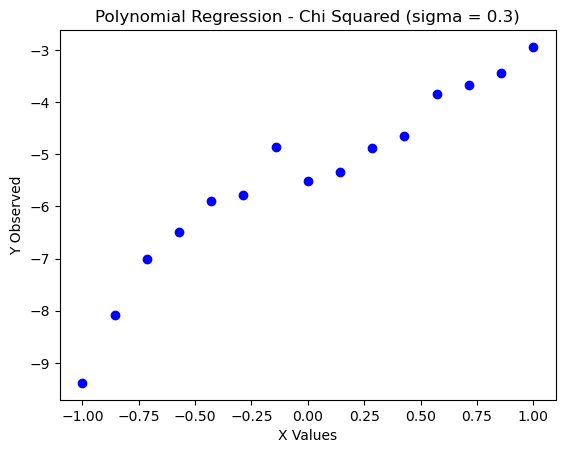

Best-fit parameters (Chi-Squared Minimization): [ 1.7321938  -0.67251128  1.06016363 -5.15081323]
Area estimation using Simpson's method: -10.812721058121213
Area estimation using Trapezoidal method: -10.75690152536656


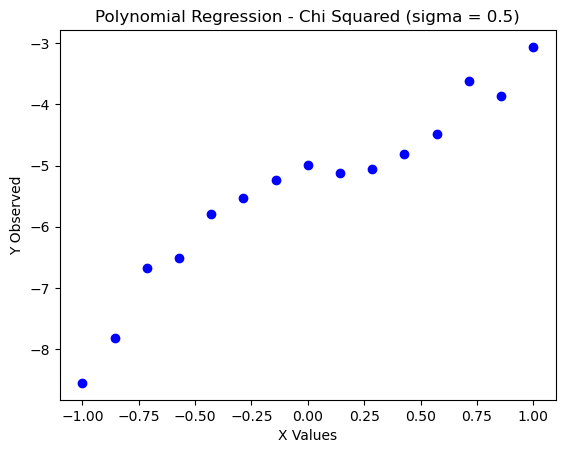

Best-fit parameters (Chi-Squared Minimization): [ 1.85111593 -1.56686443  1.641362   -4.7381324 ]
Area estimation using Simpson's method: -10.446111222660576
Area estimation using Trapezoidal method: -10.441806107806448


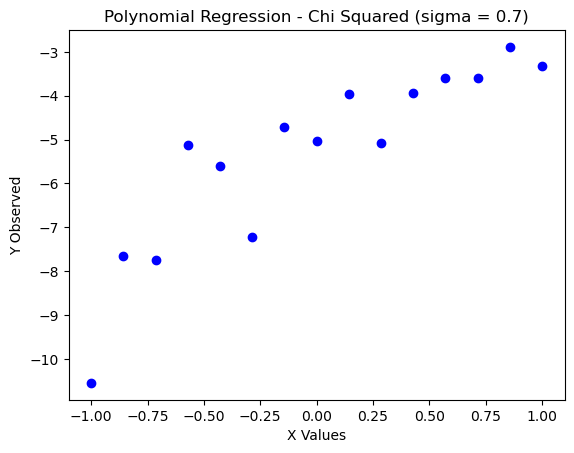

Best-fit parameters (Chi-Squared Minimization): [ 2.32513207 -0.71776173  0.61286805 -5.43957849]
Area estimation using Simpson's method: -11.39722726439433
Area estimation using Trapezoidal method: -11.368878089237556


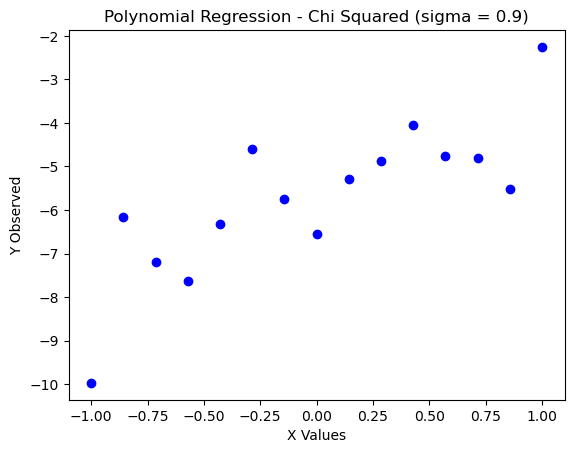

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from scipy.integrate import simps
from scipy.integrate import trapz



## arrays to hold area
chi_sq_simps = np.zeros(5)
chi_sq_trapz = np.zeros(5)


# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    # Integration using Simpson's Rule
    chi_sq_simps[i] = simps(chi_sq.y_observed, chi_sq.x_values)
    print(f"Area estimation using Simpson's method: {chi_sq_simps[i]}")
    
    # Integration using Trapezoidal Rule
    chi_sq_trapz[i] = trapz(chi_sq.y_observed, chi_sq.x_values)
    print(f"Area estimation using Trapezoidal method: {chi_sq_trapz[i]}")

    # Show the plot inline
    plt.show()

## Maximum Likelihood Estimation

Best-fit parameters (MLE): [ 2.01273353 -1.02354585  0.99709524 -5.01373524]
Area estimation using Simpson's method: -10.714264953625255
Area estimation using Trapezoidal method: -10.714895760092205


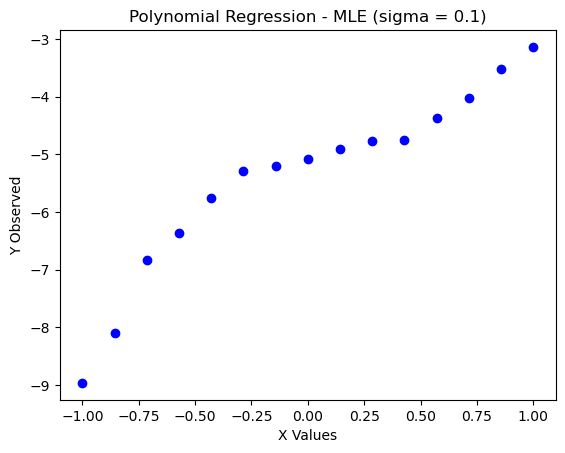

Best-fit parameters (MLE): [ 2.13518068 -0.79062667  0.9175286  -5.12989487]
Area estimation using Simpson's method: -10.822445216061677
Area estimation using Trapezoidal method: -10.789797111011652


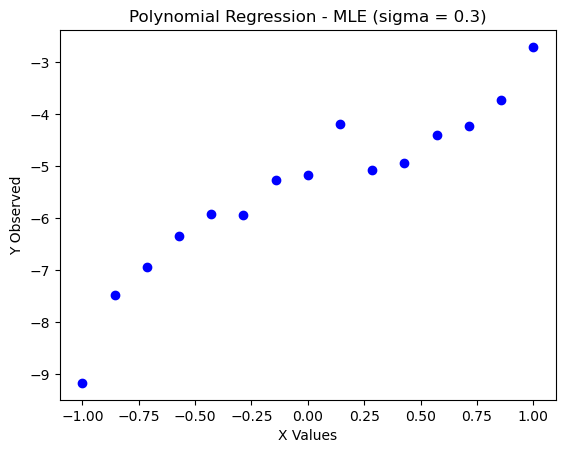

Best-fit parameters (MLE): [ 2.78310996 -1.5298556   0.40048011 -4.81788687]
Area estimation using Simpson's method: -10.6264385105851
Area estimation using Trapezoidal method: -10.667568180147285


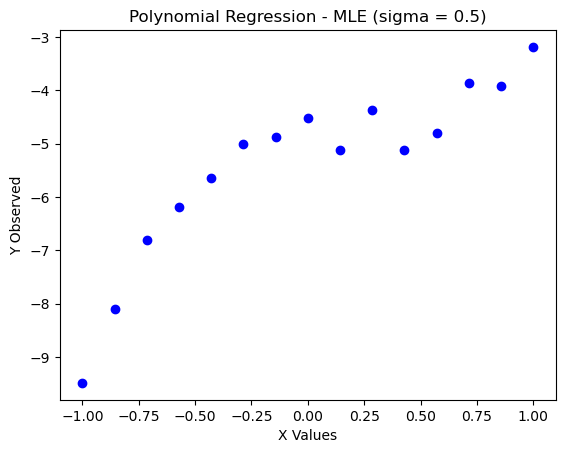

Best-fit parameters (MLE): [ 1.78814081 -1.02885169  1.36303266 -4.8966199 ]
Area estimation using Simpson's method: -10.56122080380794
Area estimation using Trapezoidal method: -10.51556931462247


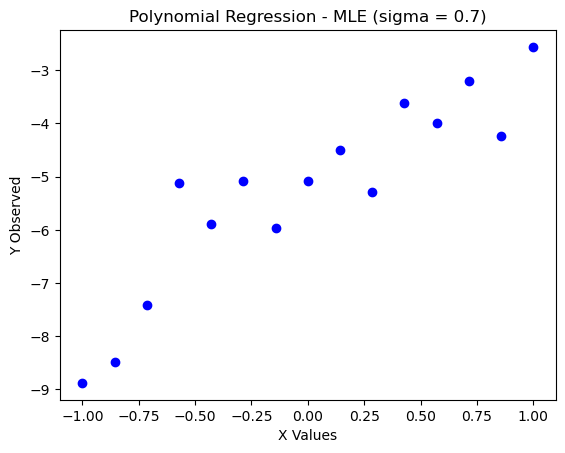

Best-fit parameters (MLE): [ 3.77352203 -1.24100527 -0.56294281 -4.99313273]
Area estimation using Simpson's method: -10.74361020696007
Area estimation using Trapezoidal method: -10.772612262782726


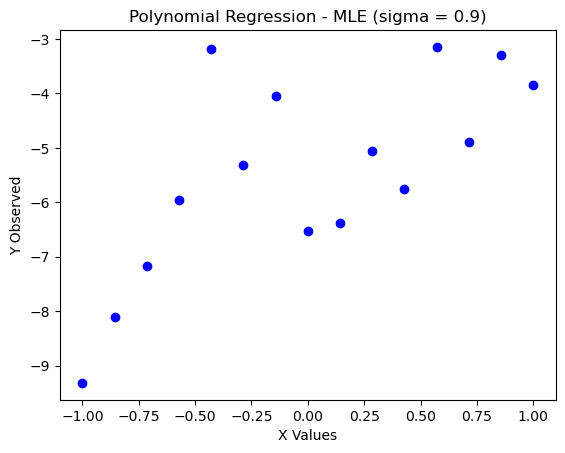

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE
from scipy.integrate import simps
from scipy.integrate import trapz



## arrays to hold area
mle_simps = np.zeros(5)
mle_trapz = np.zeros(5)


# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    # Integration using Simpson's Rule
    mle_simps[i] = simps(mle.y_observed, mle.x_values)
    print(f"Area estimation using Simpson's method: {mle_simps[i]}")
    
    # Integration using Trapezoidal Rule
    mle_trapz[i] = trapz(mle.y_observed, mle.x_values)
    print(f"Area estimation using Trapezoidal method: {mle_trapz[i]}")

    # Show the plot inline
    plt.show()

## Machine Learning Estimation

In [8]:
import tensorflow as tf
print(tf.__version__)

2.17.0


{'x_values': array([-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
       -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
        0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ]), 'sigma': 0.1, 'y_true': array([-9.        , -7.85131195, -6.95335277, -6.27113703, -5.7696793 ,
       -5.41399417, -5.16909621, -5.        , -4.87172012, -4.74927114,
       -4.59766764, -4.3819242 , -4.06705539, -3.6180758 , -3.        ]), 'y_observed': array([-9.07779458, -7.74393384, -6.89429472, -6.238216  , -5.82245042,
       -5.4143372 , -5.25955276, -5.1011066 , -4.88763762, -4.73642322,
       -4.63647742, -4.41720285, -4.07904849, -3.69176674, -2.81422198])}


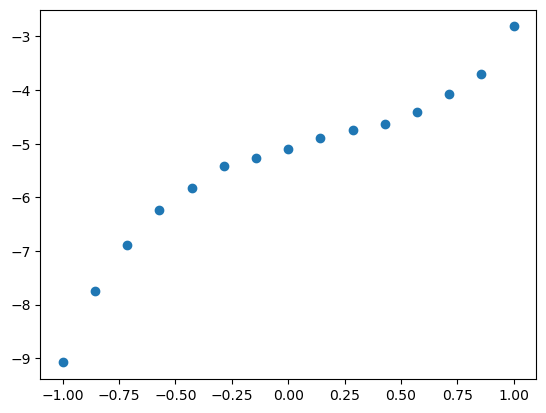

In [5]:
# Initialize values
from polynomial_regression_base import PolynomialRegressionBase
import matplotlib.pyplot as plt

model = PolynomialRegressionBase()

print(vars(model))
plt.scatter(model.x_values, model.y_observed)


In [6]:
# Reshape X and Y arrays
# reshape x and y arrays
X = model.x_values.reshape(-1, 1)  # Shape: (15, 1)
y = model.y_observed.reshape(-1, 1)  # Shape: (15, 1)



In [7]:
print(X)
print(y)

[[-1.        ]
 [-0.85714286]
 [-0.71428571]
 [-0.57142857]
 [-0.42857143]
 [-0.28571429]
 [-0.14285714]
 [ 0.        ]
 [ 0.14285714]
 [ 0.28571429]
 [ 0.42857143]
 [ 0.57142857]
 [ 0.71428571]
 [ 0.85714286]
 [ 1.        ]]
[[-9.07779458]
 [-7.74393384]
 [-6.89429472]
 [-6.238216  ]
 [-5.82245042]
 [-5.4143372 ]
 [-5.25955276]
 [-5.1011066 ]
 [-4.88763762]
 [-4.73642322]
 [-4.63647742]
 [-4.41720285]
 [-4.07904849]
 [-3.69176674]
 [-2.81422198]]


Not using test/train splits because we aren't generalizing across a larger dataset. We are also using integration for Chi-Squared and MLE, so doing the same to evaluate the TF model's performace would be more consistent and fitting. 

### Building TF model
For now, I am using a double layer sequential model with a RELU activation layer

In [8]:
import tensorflow as tf
from keras import layers
from keras import Sequential

model = Sequential([
    layers.Input(shape=(1,)),                  # Explicit Input layer
    layers.Dense(64, activation='relu'),       # First hidden layer
    layers.Dense(64, activation='relu'),       # Second hidden layer
    layers.Dense(1)                            # Output layer (linear by default for regression)
])


# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model with 500 epochs and batch size of 5
history = model.fit(X, y, epochs=150, batch_size=5, verbose=1)


Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 31.6117 - mean_absolute_error: 5.4031
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.4938 - mean_absolute_error: 5.3570
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.7182 - mean_absolute_error: 5.4990
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.6677 - mean_absolute_error: 5.1840
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.1077 - mean_absolute_error: 5.1621 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.2338 - mean_absolute_error: 5.0753
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.6699 - mean_absolute_error: 5.3126
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.4837 - mean_absolute_error: 5.0574 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.1137 - mean_absolute_error: 4.8334
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.2443 - mean_absolute_error: 4.4852
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

In [11]:
x_test = np.linspace(-1, 1, 17)
x_test

array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
        0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ])

In [14]:
predictions = model.predict(x_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[-8.390922 ],
       [-7.850293 ],
       [-7.3096647],
       [-6.772625 ],
       [-6.2904816],
       [-5.9211664],
       [-5.635888 ],
       [-5.3552504],
       [-5.083159 ],
       [-4.80707  ],
       [-4.535077 ],
       [-4.2642508],
       [-4.099719 ],
       [-3.9516528],
       [-3.813094 ],
       [-3.6962225],
       [-3.6013474]], dtype=float32)

In [15]:
print(f(x_test))

[-9.         -7.98046875 -7.15625    -6.50390625 -6.         -5.62109375
 -5.34375    -5.14453125 -5.         -4.88671875 -4.78125    -4.66015625
 -4.5        -4.27734375 -3.96875    -3.55078125 -3.        ]
